In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create outputs folder if not exists
os.makedirs("outputs", exist_ok=True)

# Load datasets
trader_df = pd.read_csv(r"C:\Users\Dell\Downloads\Ds_shehanaz\Ds_shehanaz\CSV files\historical_data.csv")
sentiment_df = pd.read_csv(r"C:\Users\Dell\Downloads\Ds_shehanaz\Ds_shehanaz\CSV files\fear_greed_index.csv")

# Check the first few rows
print("Trader Data:")
display(trader_df.head())

print("Sentiment Data:")
display(sentiment_df.head())


Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
trader_df['Timestamp IST']  # KeyError here


0        02-12-2024 22:50
1        02-12-2024 22:50
2        02-12-2024 22:50
3        02-12-2024 22:50
4        02-12-2024 22:50
               ...       
80404    30-03-2025 16:05
80405    30-03-2025 16:05
80406    30-03-2025 16:06
80407    30-03-2025 16:06
80408    30-03-2025 16:06
Name: Timestamp IST, Length: 80409, dtype: object

In [11]:
# Strip leading/trailing spaces from all column names
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()


In [13]:
print("Trader DF Columns:")
for col in trader_df.columns:
    print(f"'{col}'")


Trader DF Columns:
'Account'
'Coin'
'Execution Price'
'Size Tokens'
'Size USD'
'Side'
'Timestamp IST'
'Start Position'
'Direction'
'Closed PnL'
'Transaction Hash'
'Order ID'
'Crossed'
'Fee'
'Trade ID'
'Timestamp'
'date'


In [7]:
print("\nSentiment DF Columns:")
for col in sentiment_df.columns:
    print(f"'{col}'")



Sentiment DF Columns:
'timestamp'
'value'
'classification'
'date'


In [8]:
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()


In [9]:
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce').dt.date

In [10]:
# Clean column names again (just to be sure)
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()

# Confirm merge keys exist (no syntax errors now)
assert 'date' in trader_df.columns, "'date' column not found in trader_df"
assert 'date' in sentiment_df.columns, "'date' column not found in sentiment_df"
assert 'classification' in sentiment_df.columns, "'classification' column not found in sentiment_df"

# Now merge
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='inner'
)

# Clean merged column names too
merged_df.columns = merged_df.columns.str.strip()

# Drop rows with missing profit values
merged_df = merged_df.dropna(subset=['Closed PnL'])

# Preview result
merged_df[['date', 'Closed PnL', 'classification']].head()


,date,Closed PnL,classification


In [11]:
# Group by sentiment and calculate average Closed PnL
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()

# Display the result
print("📊 Average Closed PnL per Market Sentiment:")
print(avg_pnl)


📊 Average Closed PnL per Market Sentiment:
Series([], Name: Closed PnL, dtype: float64)


In [12]:
print("📌 Merged DF Columns:")
print(merged_df.columns.tolist())

print("\n📌 Merged DF Shape:", merged_df.shape)

print("\n📌 First 5 Rows:")
print(merged_df.head())


📌 Merged DF Columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'classification']

📌 Merged DF Shape: (0, 18)

📌 First 5 Rows:
Empty DataFrame
Columns: [Account, Coin, Execution Price, Size Tokens, Size USD, Side, Timestamp IST, Start Position, Direction, Closed PnL, Transaction Hash, Order ID, Crossed, Fee, Trade ID, Timestamp, date, classification]
Index: []


In [13]:
import pandas as pd

# Step 1: Reload clean files
trader_df = pd.read_csv(r"C:\Users\Dell\Downloads\Ds_shehanaz\Ds_shehanaz\CSV files\historical_data.csv", encoding="utf-8-sig")
sentiment_df = pd.read_csv(r"C:\Users\Dell\Downloads\Ds_shehanaz\Ds_shehanaz\CSV files\fear_greed_index.csv", encoding="utf-8-sig")

# Step 2: Strip column names to avoid errors
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()

# Step 3: Create a normalized 'date' column in both
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce').dt.normalize()
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.normalize()

# Step 4: Merge on 'date' and keep only valid classification
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='inner'
)

# Step 5: Clean column names again after merge
merged_df.columns = merged_df.columns.str.strip()

# Step 6: Print basic info
print("✅ Columns:", merged_df.columns.tolist())
print("✅ Rows after merge:", merged_df.shape[0])
print("✅ Classification values:", merged_df['classification'].unique())


✅ Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'classification']
✅ Rows after merge: 15281
✅ Classification values: ['Greed' 'Extreme Greed' 'Fear' 'Extreme Fear' 'Neutral']


In [14]:

# Drop rows with missing Closed PnL (just in case)
merged_df = merged_df.dropna(subset=['Closed PnL'])

# Group by sentiment classification
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()

# Display result
print("📊 Average Closed PnL by Market Sentiment:")
print(avg_pnl)


📊 Average Closed PnL by Market Sentiment:
classification
Extreme Fear      19.761292
Neutral           37.430126
Greed             79.741839
Fear             242.440019
Extreme Greed    454.071964
Name: Closed PnL, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_9872\2042668068.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


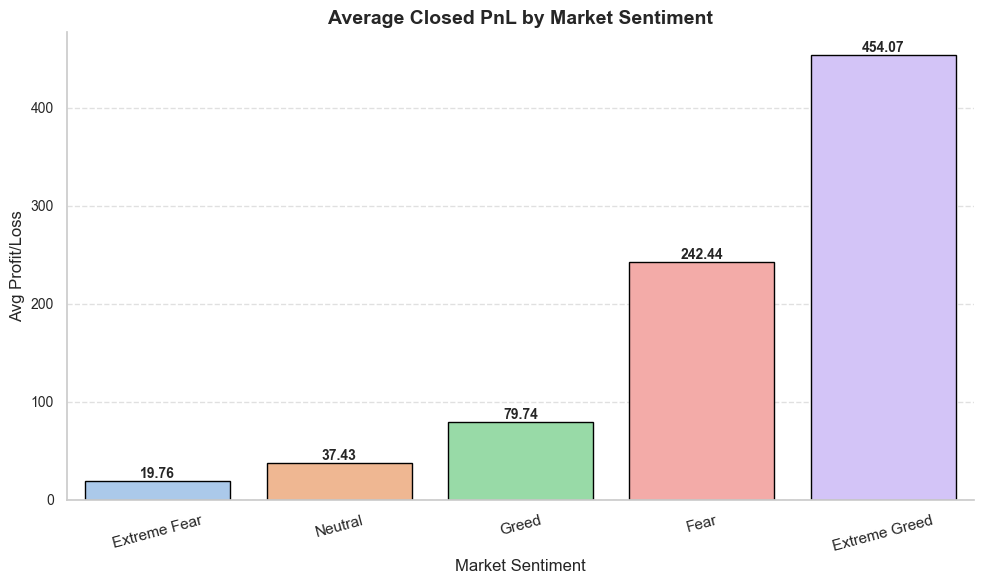

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Calculate avg_pnl
merged_df = merged_df.dropna(subset=['Closed PnL'])
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()

# Step 2: Set clean seaborn style
sns.set_theme(style="whitegrid")

# Step 3: Clean plot colors and layout
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")[:len(avg_pnl)]

ax = sns.barplot(
    x=avg_pnl.index,
    y=avg_pnl.values,
    palette=colors,
    edgecolor='black'
)

# Add value labels
for i, v in enumerate(avg_pnl.values):
    ax.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom', fontsize=10, fontweight='semibold')

# Titles and labels
plt.title("Average Closed PnL by Market Sentiment", fontsize=14, fontweight='bold')
plt.ylabel("Avg Profit/Loss", fontsize=12)
plt.xlabel("Market Sentiment", fontsize=12)
plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()

# Save and show
os.makedirs("outputs", exist_ok=True)
plt.tight_layout()
plt.savefig("outputs/profit_vs_sentiment.png", dpi=300)
plt.show()


In [18]:
with open("requirements.txt", "w") as f:
    f.write("""pandas==2.2.1
numpy==1.26.4
matplotlib==3.8.4
seaborn==0.13.2
jupyter==1.0.0
""")

print("✅ requirements.txt has been created successfully.")




✅ requirements.txt has been created successfully.


In [19]:
!pip install -r requirements.txt


     ---------------------------------------- 0.0/4.4 MB ? eta -:--:--
     -- ------------------------------------- 0.3/4.4 MB ? eta -:--:--
     ---- ----------------------------------- 0.5/4.4 MB 2.0 MB/s eta 0:00:02
     --------- ------------------------------ 1.0/4.4 MB 2.0 MB/s eta 0:00:02
     --------- ------------------------------ 1.0/4.4 MB 2.0 MB/s eta 0:00:02
     ----------- ---------------------------- 1.3/4.4 MB 1.3 MB/s eta 0:00:03
     ----------- ---------------------------- 1.3/4.4 MB 1.3 MB/s eta 0:00:03
     ---------------- ----------------------- 1.8/4.4 MB 1.3 MB/s eta 0:00:03
     --------------------- ------------------ 2.4/4.4 MB 1.4 MB/s eta 0:00:02
     ----------------------- ---------------- 2.6/4.4 MB 1.4 MB/s eta 0:00:02
     ---------------------------- ----------- 3.1/4.4 MB 1.5 MB/s eta 0:00:01
     --------------------------------- ------ 3.7/4.4 MB 1.6 MB/s eta 0:00:01
     ----------------------------------- ---- 3.9/4.4 MB 1.6 MB/s eta 0:00:01


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [98 lines of output]
       ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
       ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
        --------------------------------------- 0.3/15.8 MB ? eta -:--:--
       - -------------------------------------- 0.8/15.8 MB 1.5 MB/s eta 0:00:11
       -- ------------------------------------- 1.0/15.8 MB 1.5 MB/s eta 0:00:10
       --- ------------------------------------ 1.6/15.8 MB 1.7 MB/s eta 0:00:09
       ---- ----------------------------------- 1.8/15.8 MB 1.7 MB/s eta 0:00:09
       ----- ---------------------------------- 2.4/15.8 MB 1.7 MB/s eta 0:00:08
       ------ --------------------------------- 2.6/15.8 MB 1.8 MB/s eta 0:00:08
       ------- -------------------------------- 3.1/15.8 MB 1.8 MB/s eta 0:00:08
       -------- ------------------------------- 3.4/15.8